# Credit Risk Assesment

## Import libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder

In [7]:
df_cred = pd.read_csv('dataset/loan_data.csv')
df_cred.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data understanding

In [8]:
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Missing values

In [10]:
full_non_full = [
    col for col in df_cred.columns 
    if df_cred[col].isnull().all()]

print(full_non_full)
print(len(full_non_full), 'columns')

['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
17 columns


In [11]:
df_cred = df_cred.drop(axis = 1, columns = full_non_full)
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [12]:
percent_missing = df_cred.isnull().sum() * 100 / len(df_cred)
dtypes = [df_cred[col].dtype for col in df_cred.columns]
missing_value_df = pd.DataFrame({
    'data_type':dtypes,
    'percent_missing':percent_missing
})

missing_value_df.sort_values('percent_missing', ascending = False, inplace = True)
missing_value_df.head(10)

,data_type,percent_missing
mths_since_last_record,float64,86.566585
mths_since_last_major_derog,float64,78.773926
desc,object,72.981975
mths_since_last_delinq,float64,53.690554
next_pymnt_d,object,48.728567
tot_cur_bal,float64,15.071469
tot_coll_amt,float64,15.071469
total_rev_hi_lim,float64,15.071469
emp_title,object,5.916553
emp_length,object,4.505399


In [14]:
missing_value_df.tail(48)

,data_type,percent_missing
last_pymnt_d,object,0.080637
revol_util,float64,0.072917
collections_12_mths_ex_med,float64,0.031097
last_credit_pull_d,object,0.009007
pub_rec,float64,0.006219
inq_last_6mths,float64,0.006219
delinq_2yrs,float64,0.006219
open_acc,float64,0.006219
earliest_cr_line,object,0.006219
acc_now_delinq,float64,0.006219


In [15]:
df_cred.duplicated().sum()

0

## Data preparation

#### Handling missing values
Removing `mths_since_last_record`, `desc`, and `next_pymnt_d`.

In [16]:
df_cred = df_cred[df_cred.columns[
            ~df_cred.columns.isin(['mths_since_last_record', 'desc', 'next_pymnt_d'])
]]
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [17]:
df_cred.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


#### Imputation

In [18]:
for col in ['mths_since_last_major_derog', 'mths_since_last_delinq']:
    df_cred[col] = df_cred[col].fillna(0)

In [19]:
df_cred[['mths_since_last_major_derog', 'mths_since_last_delinq']].isnull().sum()

mths_since_last_major_derog    0
mths_since_last_delinq         0
dtype: int64

In [20]:
for col in df_cred.select_dtypes(exclude = 'object'):
    df_cred[col] = df_cred[col].fillna(df_cred[col].median())

df_cred.isnull().sum()

Unnamed: 0                         0
id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      27588
emp_length                     21008
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
purpose                            0
title                             21
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                  29
i

In [21]:
for col in df_cred.select_dtypes(include='object'):
    df_cred[col] = df_cred[col].fillna(df_cred[col].mode().iloc[0])
print("Updated Missing Values")

df_cred.isnull().sum()

Updated Missing Values


Unnamed: 0                     0
id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec   

In [22]:
df_cred.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


#### Checking unique values

In [23]:
print("Unique Features (Numerical)")
print(df_cred.select_dtypes(exclude = 'object').nunique())

Unique Features (Numerical)
Unnamed: 0                     466285
id                             466285
member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
int_rate                          506
installment                     55622
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
out_prncp_inv                  141189
total_pymnt                    351609
total_pymnt_inv                347659
total_rec_prncp                172713
total_rec_int                  270249
total_rec_late_fee               5808
recoveries            

In [24]:
print("Unique Features (Categorical)")
print(df_cred.select_dtypes(exclude = ['int','float']).nunique())

Unique Features (Categorical)
term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    466285
purpose                    14
title                   63098
zip_code                  888
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
last_credit_pull_d        103
application_type            1
dtype: int64


In [25]:
df_cred["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [26]:
def word_strip(x):
  return x.strip()
  
df_cred['term'] = df_cred['term'].apply(lambda x: word_strip(x))
df_cred["term"].unique()

array(['36 months', '60 months'], dtype=object)

In [27]:
df_cred["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [28]:
df_cred["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [29]:
df_cred["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [30]:
df_cred["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [31]:
df_cred["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [32]:
df_cred["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

### Formatting target variable

In [33]:
df_cred["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [34]:
# Define a dictionary for encoding target variable
target_dict = {'Fully Paid':1,
               'Does not meet the credit policy. Status:Fully Paid':1,
               'Charged Off':0,
               'Does not meet the credit policy. Status:Charged Off':0,
               'Default':0,
               'Late (31-120 days)':0,
               'Current':-1,
               'In Grace Period':-1,
               'Late (16-30 days)':-1}
# Create the mapped values in a new column
df_cred['loan_status'] = df_cred['loan_status'].map(target_dict)
# Review dataset
df_cred.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,-1,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


In [35]:
df_cred = df_cred.loc[~df_cred['loan_status'].isin([-1])].reset_index(drop = True)
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   237695 non-null  int64  
 1   id                           237695 non-null  int64  
 2   member_id                    237695 non-null  int64  
 3   loan_amnt                    237695 non-null  int64  
 4   funded_amnt                  237695 non-null  int64  
 5   funded_amnt_inv              237695 non-null  float64
 6   term                         237695 non-null  object 
 7   int_rate                     237695 non-null  float64
 8   installment                  237695 non-null  float64
 9   grade                        237695 non-null  object 
 10  sub_grade                    237695 non-null  object 
 11  emp_title                    237695 non-null  object 
 12  emp_length                   237695 non-null  object 
 13 

In [36]:
df_cred.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
237690,466276,9695736,11547808,8525,8525,8525.0,60 months,18.25,217.65,D,D3,MANAGER,5 years,MORTGAGE,37536.0,Verified,Jan-14,0,n,https://www.lendingclub.com/browse/loanDetail....,medical,Medical expenses,011xx,MA,12.28,4.0,Nov-94,0.0,3.0,12.0,0.0,5318,10.7,26.0,f,0.0,0.0,2029.930000,2029.93,360.08,510.45,0.0,1159.4,11.594,May-14,217.65,Oct-14,0.0,4.0,1,INDIVIDUAL,0.0,0.0,116995.0,49800.0
237691,466277,9007579,10799568,18000,18000,17975.0,36 months,7.90,563.23,A,A4,sales rep,3 years,RENT,90000.0,Verified,Jan-14,0,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,my loan,212xx,MD,10.33,1.0,Jul-98,0.0,14.0,16.0,0.0,8224,16.3,33.0,f,0.0,0.0,5631.670000,5623.85,4580.89,1050.78,0.0,0.0,0.000,Nov-14,563.23,Oct-14,0.0,14.0,1,INDIVIDUAL,0.0,0.0,42592.0,50300.0
237692,466278,9745590,11597671,10000,10000,10000.0,36 months,18.25,362.78,D,D3,MecÃ¡nica,10+ years,RENT,42000.0,Source Verified,Jan-14,1,n,https://www.lendingclub.com/browse/loanDetail....,vacation,Vacation,201xx,VA,11.57,0.0,Jun-02,0.0,29.0,9.0,0.0,3196,28.8,24.0,f,0.0,0.0,12394.165200,12394.17,10000.00,2394.17,0.0,0.0,0.000,Sep-15,5501.60,Jan-16,0.0,32.0,1,INDIVIDUAL,0.0,0.0,10170.0,11100.0
237693,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,0,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,0.0,18.0,1.0,18238,46.3,30.0,f,0.0,0.0,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.000,Dec-14,17.50,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
237694,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,21.0,0.0,11404,21.5,27.0,w,0.0,0.0,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.000,Dec-14,1500.68,Apr-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0


#### Datetime setting

In [39]:
# The month the borrower's earliest reported credit line was opened
df_cred['earliest_cr_line'].value_counts()
df_cred['earliest_cr_line'] = pd.to_datetime(df_cred['earliest_cr_line'], format = '%b-%y')

# The most recent month LC pulled credit for this loan
df_cred['last_credit_pull_d'].value_counts()

# Last month payment was received
df_cred['last_pymnt_d'].value_counts()

# The month which the loan was funded
df_cred['issue_d'].value_counts()
df_cred[['issue_d','last_pymnt_d','last_credit_pull_d']].head(5)

,issue_d,last_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-15,Jan-16
1,Dec-11,Apr-13,Sep-13
2,Dec-11,Jun-14,Jan-16
3,Dec-11,Jan-15,Jan-15
4,Dec-11,Jan-15,Sep-15


In [40]:
def date_time(dt):
  if dt.year > 2016:
    dt = dt.replace(year = dt.year-100)
  return dt

In [41]:
# Set standard datetime
df_cred['earliest_cr_line'] = pd.to_datetime(df_cred['earliest_cr_line'], format = '%b-%y') # The month the borrower's earliest reported credit line was opened
df_cred['earliest_cr_line'] = df_cred['earliest_cr_line'].apply(lambda x: date_time(x))
df_cred['issue_d'] = pd.to_datetime(df_cred['issue_d'], format = '%b-%y') # The month which the loan was funded
df_cred['last_pymnt_d'] = pd.to_datetime(df_cred['last_pymnt_d'],format='%b-%y') # Last month payment was received
df_cred['last_credit_pull_d'] = pd.to_datetime(df_cred['last_credit_pull_d'],format = '%b-%y') # The most recent month LC pulled credit for this loan
df_cred[['earliest_cr_line','issue_d','last_pymnt_d','last_credit_pull_d']].head(5)

,earliest_cr_line,issue_d,last_pymnt_d,last_credit_pull_d
0,1985-01-01,2011-12-01,2015-01-01,2016-01-01
1,1999-04-01,2011-12-01,2013-04-01,2013-09-01
2,2001-11-01,2011-12-01,2014-06-01,2016-01-01
3,1996-02-01,2011-12-01,2015-01-01,2015-01-01
4,2004-11-01,2011-12-01,2015-01-01,2015-09-01


In [43]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [44]:
((df_cred.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis = 1) < 0)).any().any()

False

In [45]:
((df_cred.apply(lambda x: diff_month(x.last_credit_pull_d, x.earliest_cr_line), axis = 1) < 0)).any().any()

False

In [46]:
def diff_year(d1, d2):
    return (d1.year - d2.year)

In [47]:
df_cred['pymnt_time'] = df_cred.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis = 1)
df_cred['credit_pull_year'] = df_cred.apply(lambda x: diff_year(x.last_credit_pull_d, x.earliest_cr_line), axis = 1)
print('Adding features succeed')

Adding features succeed


In [48]:
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   237695 non-null  int64         
 1   id                           237695 non-null  int64         
 2   member_id                    237695 non-null  int64         
 3   loan_amnt                    237695 non-null  int64         
 4   funded_amnt                  237695 non-null  int64         
 5   funded_amnt_inv              237695 non-null  float64       
 6   term                         237695 non-null  object        
 7   int_rate                     237695 non-null  float64       
 8   installment                  237695 non-null  float64       
 9   grade                        237695 non-null  object        
 10  sub_grade                    237695 non-null  object        
 11  emp_title                 

In [49]:
df_cred.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30,15
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,19
4,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,2004-11-01,3.0,0.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,2015-01-01,161.03,2015-09-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,11


In [50]:
df_cred.to_csv('df_cred.csv', index = False)
!cp 'df_cred.csv' '/dataset'
print('Saving cleaned data is done!')

cp: /dataset: Read-only file system
Saving cleaned data is done!


In [52]:
df_cred = pd.read_csv('df_cred.csv')
df_cred.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30,15
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,19
4,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,2004-11-01,3.0,0.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,2015-01-01,161.03,2015-09-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,11


## Analysis Descriptive Statistics

#### Numerical features

In [53]:
df_cred.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
count,237695.000000,2.376950e+05,2.376950e+05,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,2.376950e+05,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,2.376950e+05,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.00000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.0,237695.000000,2.376950e+05,2.376950e+05,2.376950e+05,237695.000000,237695.000000
mean,195200.469408,8.538434e+06,9.654050e+06,13474.354320,13428.704117,13299.951072,13.844646,416.623498,7.192614e+04,0.785574,16.428473,0.247266,0.906759,15.389314,10.853943,0.134551,1.522281e+04,54.972813,24.807181,328.398096,328.288404,13400.287691,13268.260483,11107.76574,2124.180394,0.922284,167.419279,17.579793,5686.209093,0.005856,7.617001,1.0,0.002886,1.445875e+02,1.211644e+05,2.734911e+04,18.656960,17.543516
std,133663.663387,9.261314e+06,1.005098e+07,8061.451689,8036.706263,8074.666938,4.378830,243.631791,5.516305e+04,0.410424,7.694727,0.733731,1.173825,22.604891,4.824864,0.420928,1.920837e+04,24.668079,11.662542,2186.834678,2186.195130,9397.236754,9409.265943,8162.54337,2153.943862,6.269179,764.502771,119.105531,6854.640584,0.082857,18.733495,0.0,0.058449,1.882389e+04,1.298310e+05,2.440079e+04,11.283279,7.047302
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
25%,82615.500000,1.375144e+06,1.612612e+06,7200.000000,7200.000000,7125.000000,10.990000,239.180000,4.500000e+04,1.000000,10.710000,0.000000,0.000000,0.000000,7.000000,0.000000,5.911000e+03,37.200000,16.000000,0.000000,0.000000,6293.950000,6170.005000,4927.27500,743.845000,0.000000,0.000000,0.000000,419.580000,0.000000,0.000000,1.0,0.000000,0.000000e+00,3.974250e+04,1.640000e+04,10.000000,13.000000
50%,182944.000000,5.425530e+06,6.438294e+06,12000.000000,12000.000000,11900.000000,13.670000,365.010000,6.142500e+04,1.000000,16.130000,0.000000,1.000000,0.000000,10.000000,0.000000,1.098800e+04,56.700000,23.000000,0.000000,0.000000,11249.138230,11139.190000,9750.00000,1462.590000,0.000000,0.000000,0.000000,2973.230000,0.000000,0.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04,16.000000,16.000000
75%,295296.000000,1.245681e+07,1.442943e+07,18000.000000,18000.000000,18000.000000,16.590000,545.330000,8.600000e+04,1.000000,21.870000,0.000000,1.000000,28.000000,13.000000,0.000000,1.906700e+04,74.400000,32.000000,0.000000,0.000000,18187.944480,18041.215000,15250.00000,2696.590000,0.000000,0.000000,0.000000,8852.010000,0.000000,0.000000,1.0,0.000000,0.000000e+00,1.568880e+05,2.940000e+04,27.000000,21.000000
max,466283.000000,3.785416e+07,4.061688e+07,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,1.000000,39.990000,29.000000,33.000000,152.000000,76.000000,11.000000,1.746716e+06,892.300000,150.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.03000,22777.580000,358.680000,33520.270000,7002.190000,36234.440000,6.000000,154.000000,1.0,5.000000,9.152545e+06,8.000078e+06,2.013133e+06,95.000000,68.000000


#### Categorical features

In [54]:
df_cred.describe(exclude = ['int', 'float'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
count,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695
unique,2,7,35,129469,11,6,3,91,2,237695,14,49853,874,50,634,2,98,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,2014-10-01,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,945xx,CA,2000-10-01,f,2015-07-01,2016-01-01,INDIVIDUAL
freq,185700,71990,17316,15023,80095,116769,88337,9704,237689,1,138318,59816,3044,40386,2056,177046,11703,100503,237695


#### Analysing distribution plot

In [55]:
df_cred.dtypes.value_counts()

float64    28
object     19
int64      10
Name: count, dtype: int64

In [56]:
non_used = ['Unnamed: 0','id','member_id','policy_code', 'loan_status']
uni_dist = df_cred.select_dtypes(include = [np.float64,np.int64])
uni_dist = uni_dist[uni_dist.columns[~uni_dist.columns.isin(non_used)]]

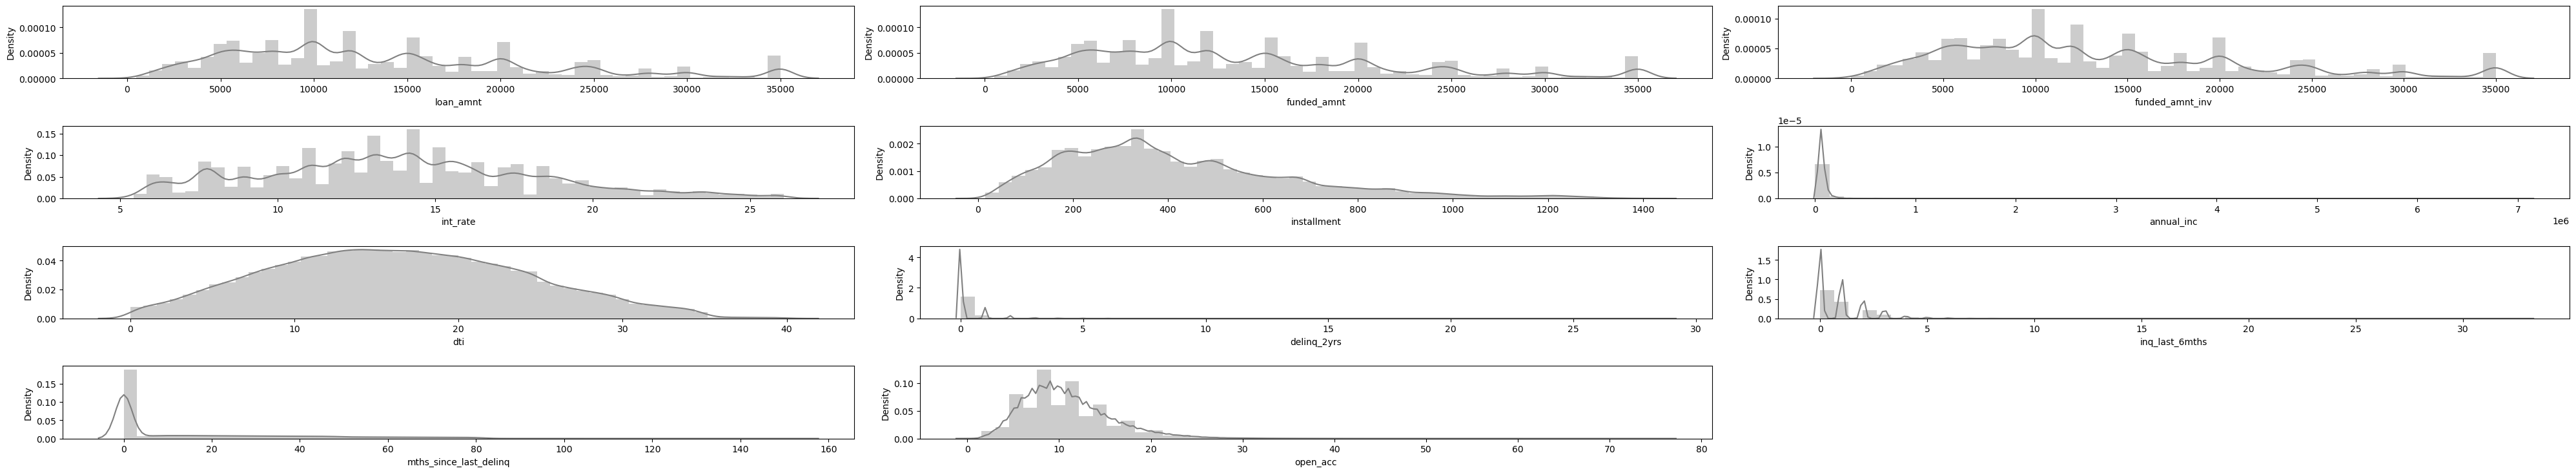

In [59]:
plt.figure(figsize = (40, 20))
for i in range(0, 11):
    plt.subplot(11, 3, i+1)
    sns.distplot(uni_dist.iloc[:,i], color = 'gray')
    plt.tight_layout()

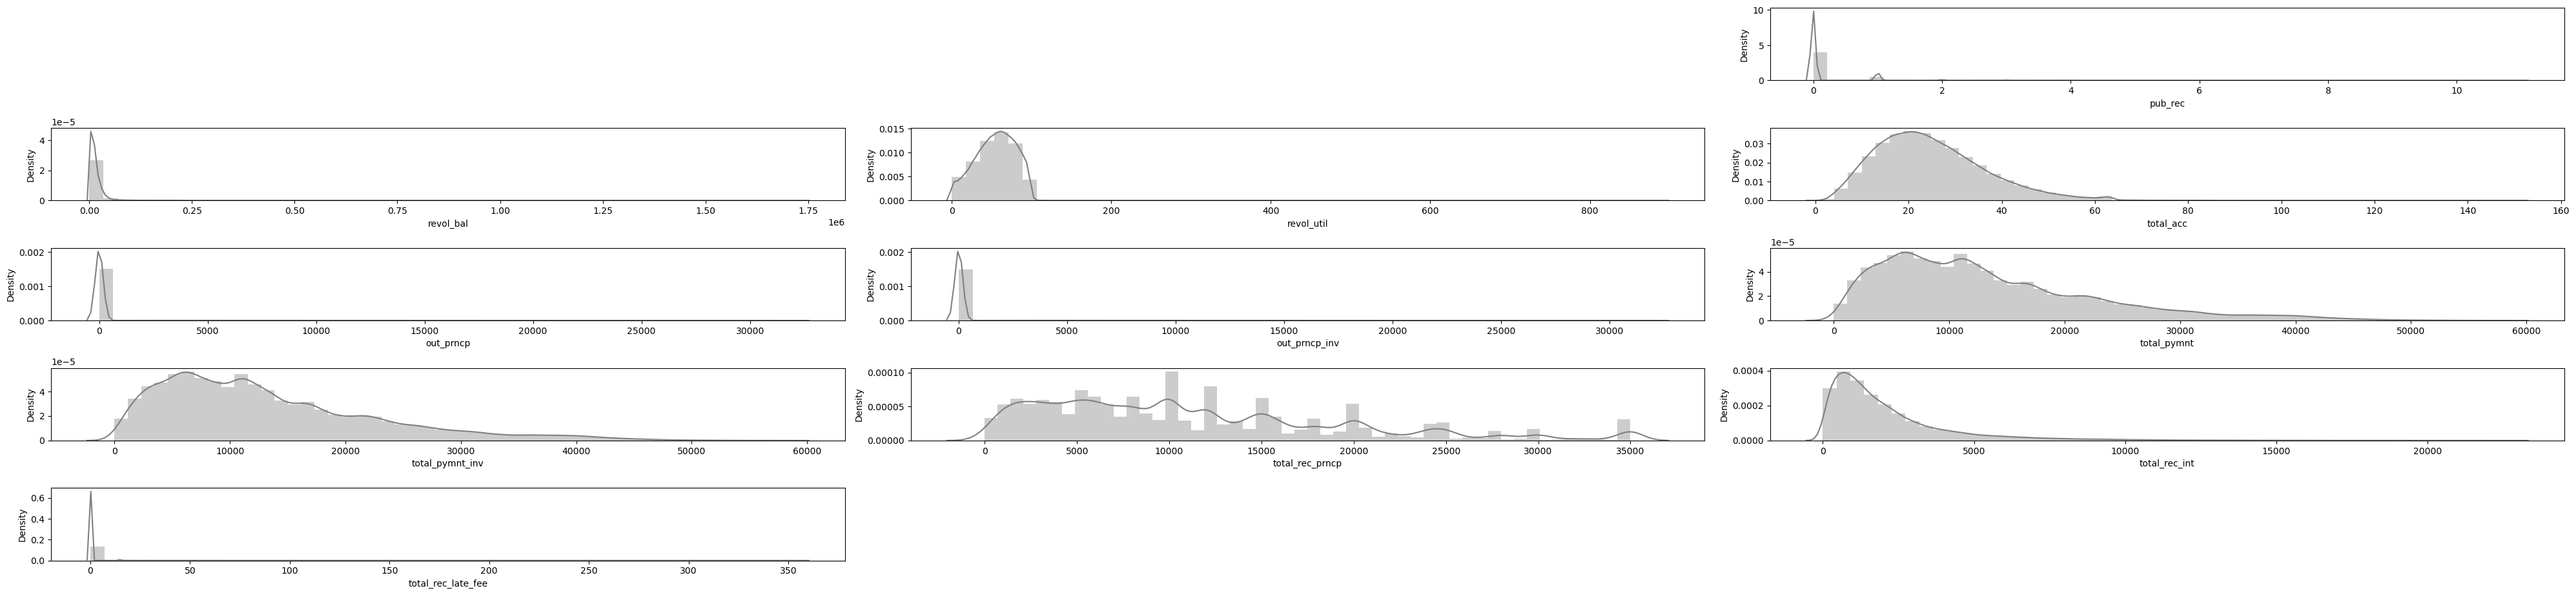

In [60]:
plt.figure(figsize = (40, 20))
for i in range(11, 22):
    plt.subplot(11, 3, i+1)
    sns.distplot(uni_dist.iloc[:,i], color = 'gray')
    plt.tight_layout()

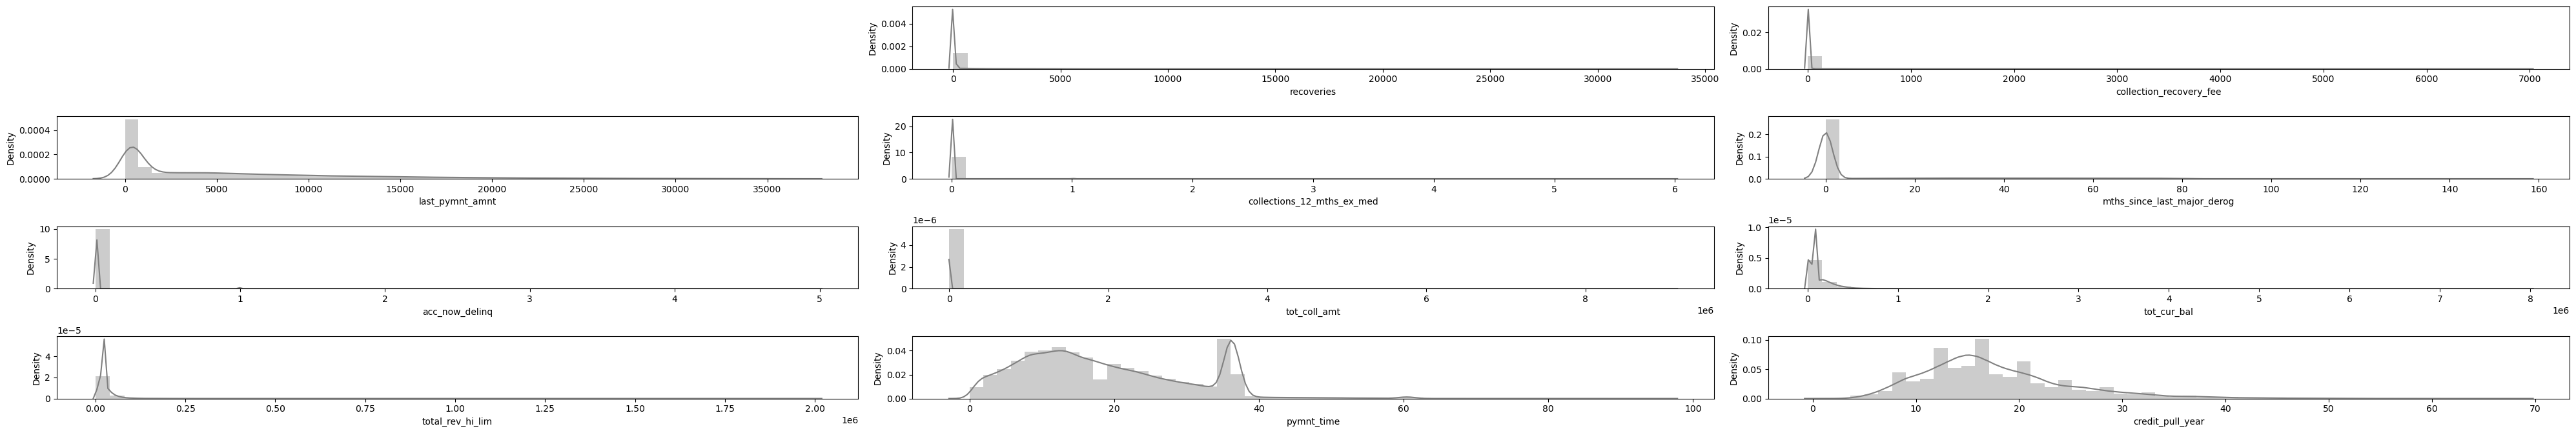

In [61]:
plt.figure(figsize = (40, 20))
for i in range(22, 33):
    plt.subplot(12, 3, i+1)
    sns.distplot(uni_dist.iloc[:,i], color = 'gray')
    plt.tight_layout()

#### Analysing box plot

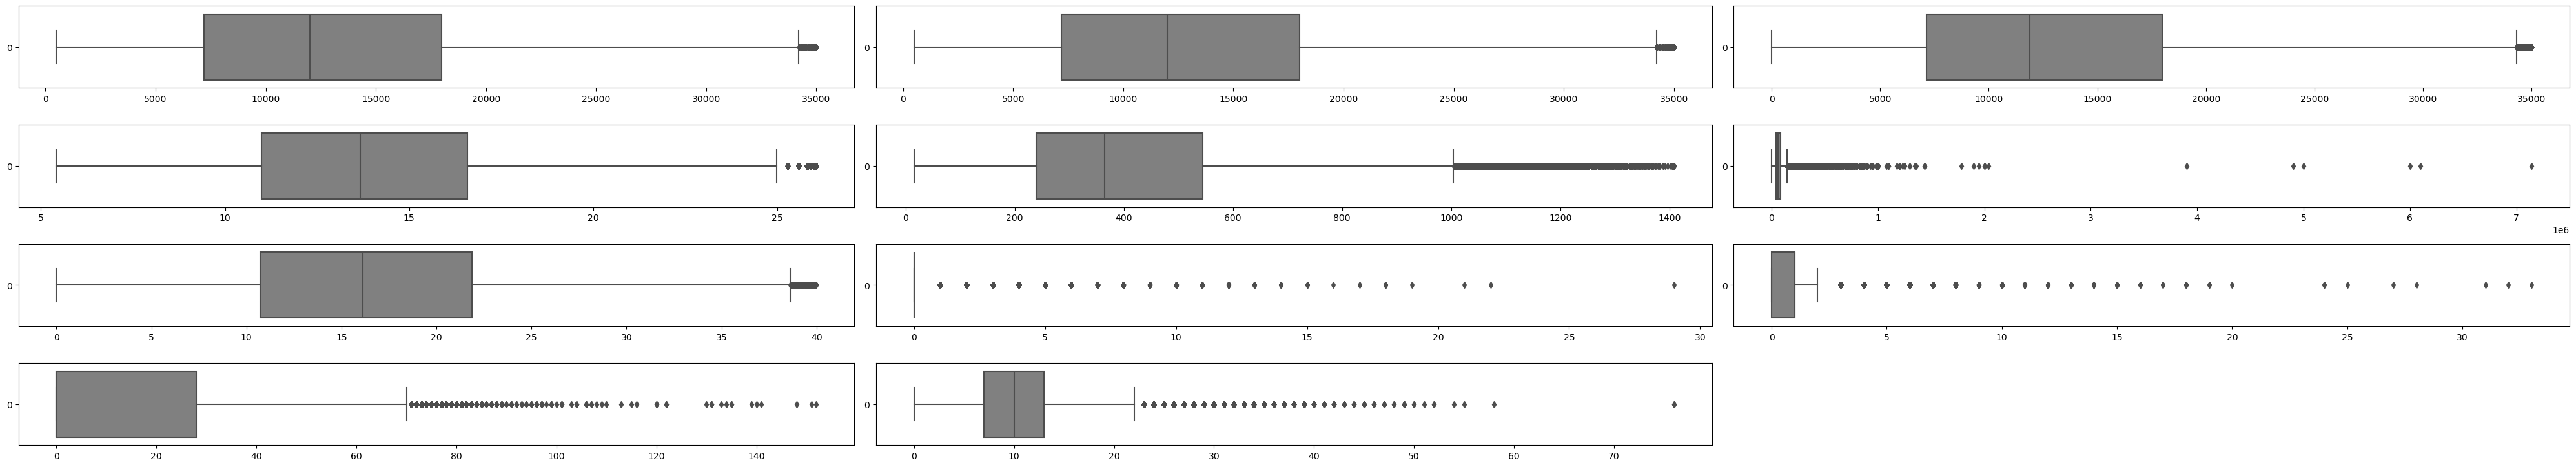

In [63]:
plt.figure(figsize = (40, 20))
for i in range(0, 11):
    plt.subplot(11, 3, i+1)
    sns.boxplot(uni_dist.iloc[:,i], color = 'gray', orient = 'h')
    plt.tight_layout()

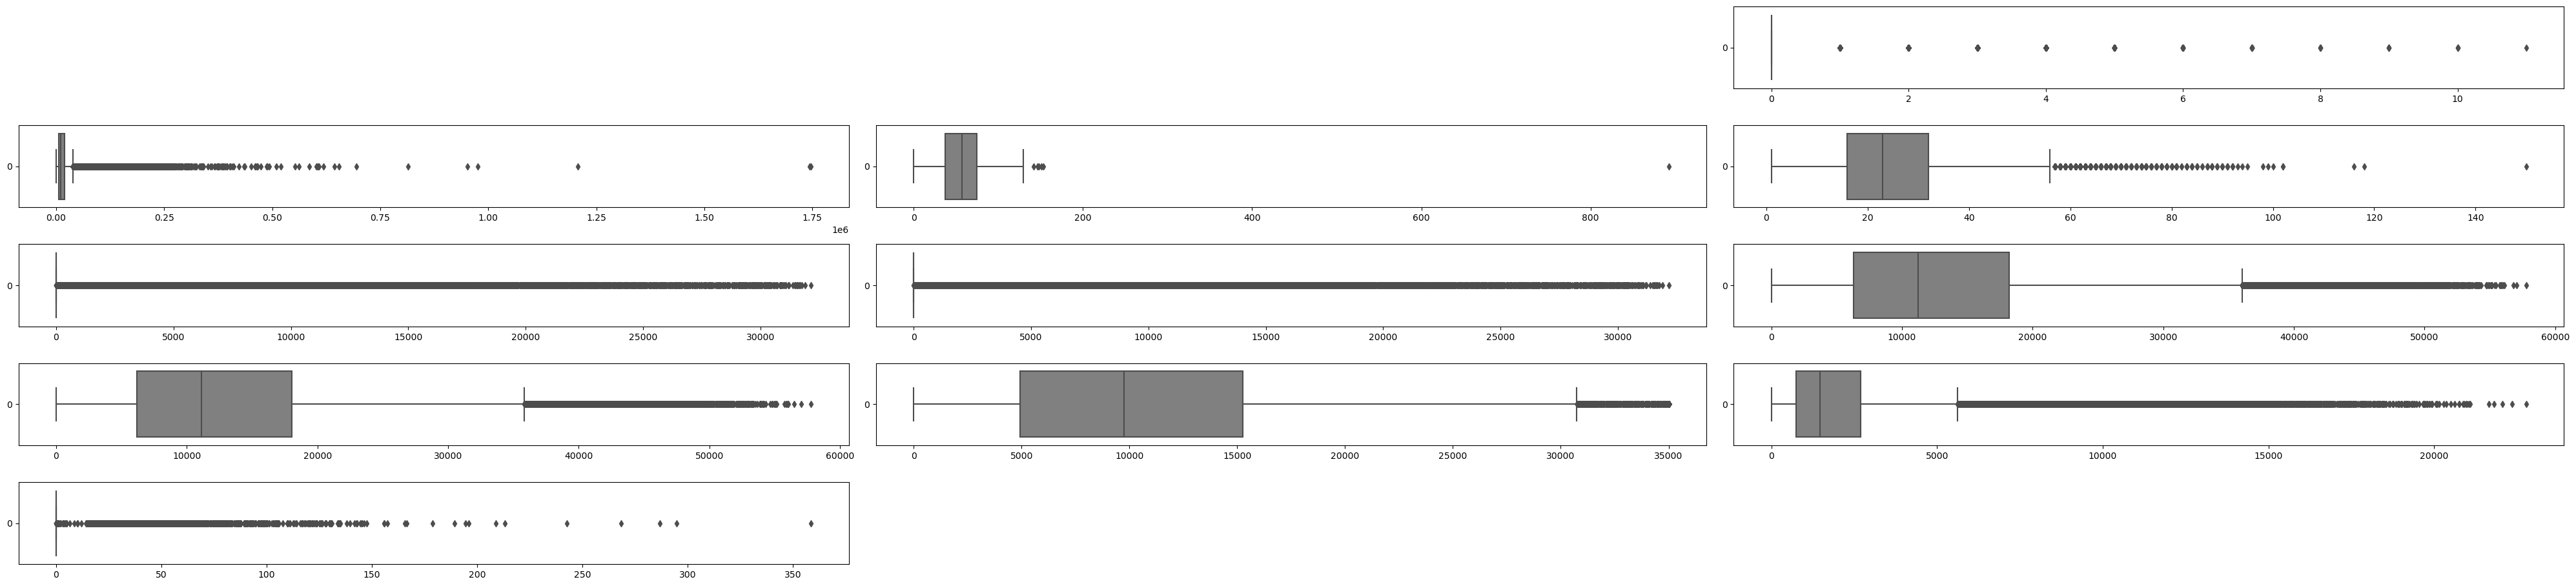

In [64]:
plt.figure(figsize = (40, 20))
for i in range(11, 22):
    plt.subplot(11, 3, i+1)
    sns.boxplot(uni_dist.iloc[:,i], color = 'gray', orient = 'h')
    plt.tight_layout()

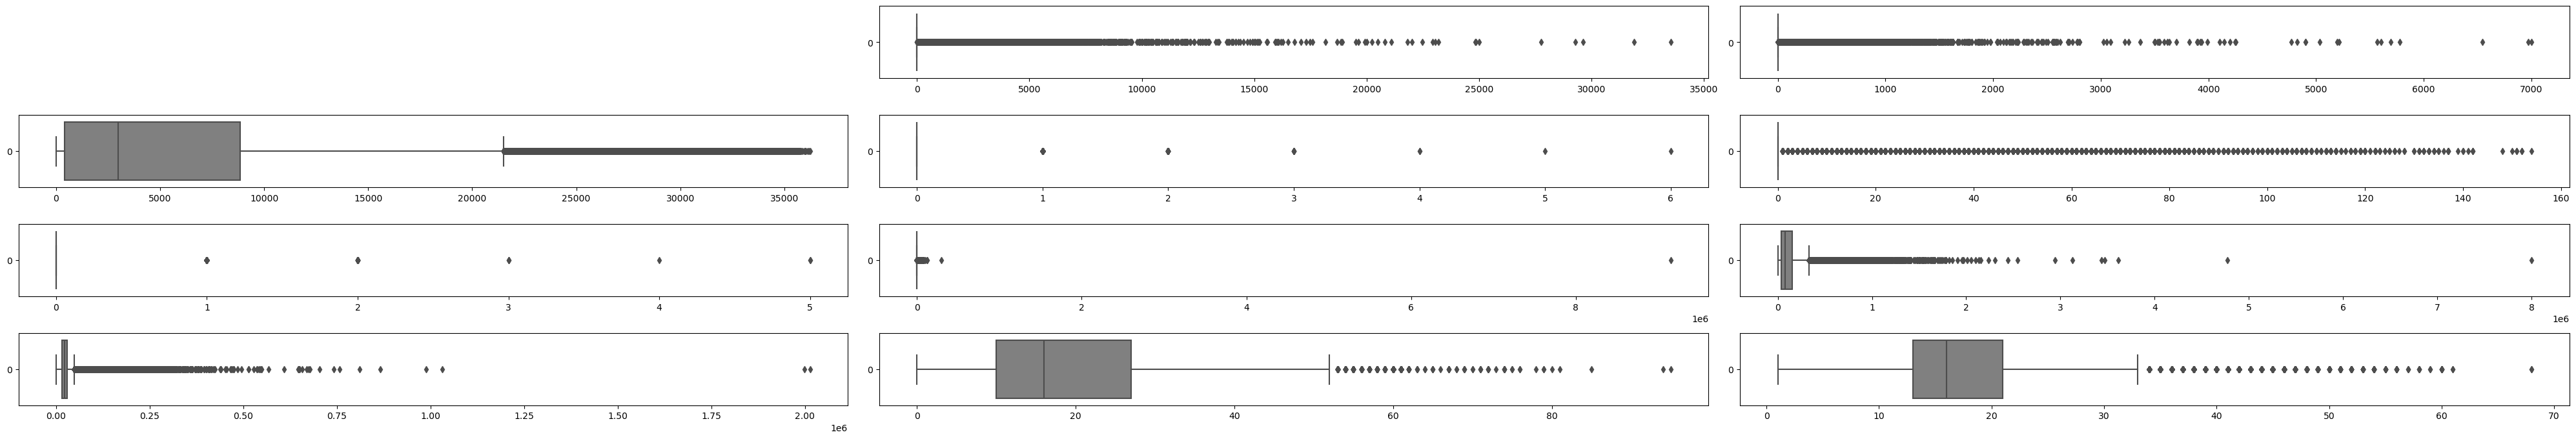

In [65]:
plt.figure(figsize = (40, 20))
for i in range(22, 33):
    plt.subplot(12, 3, i+1)
    sns.boxplot(uni_dist.iloc[:,i], color = 'gray', orient = 'h')
    plt.tight_layout()

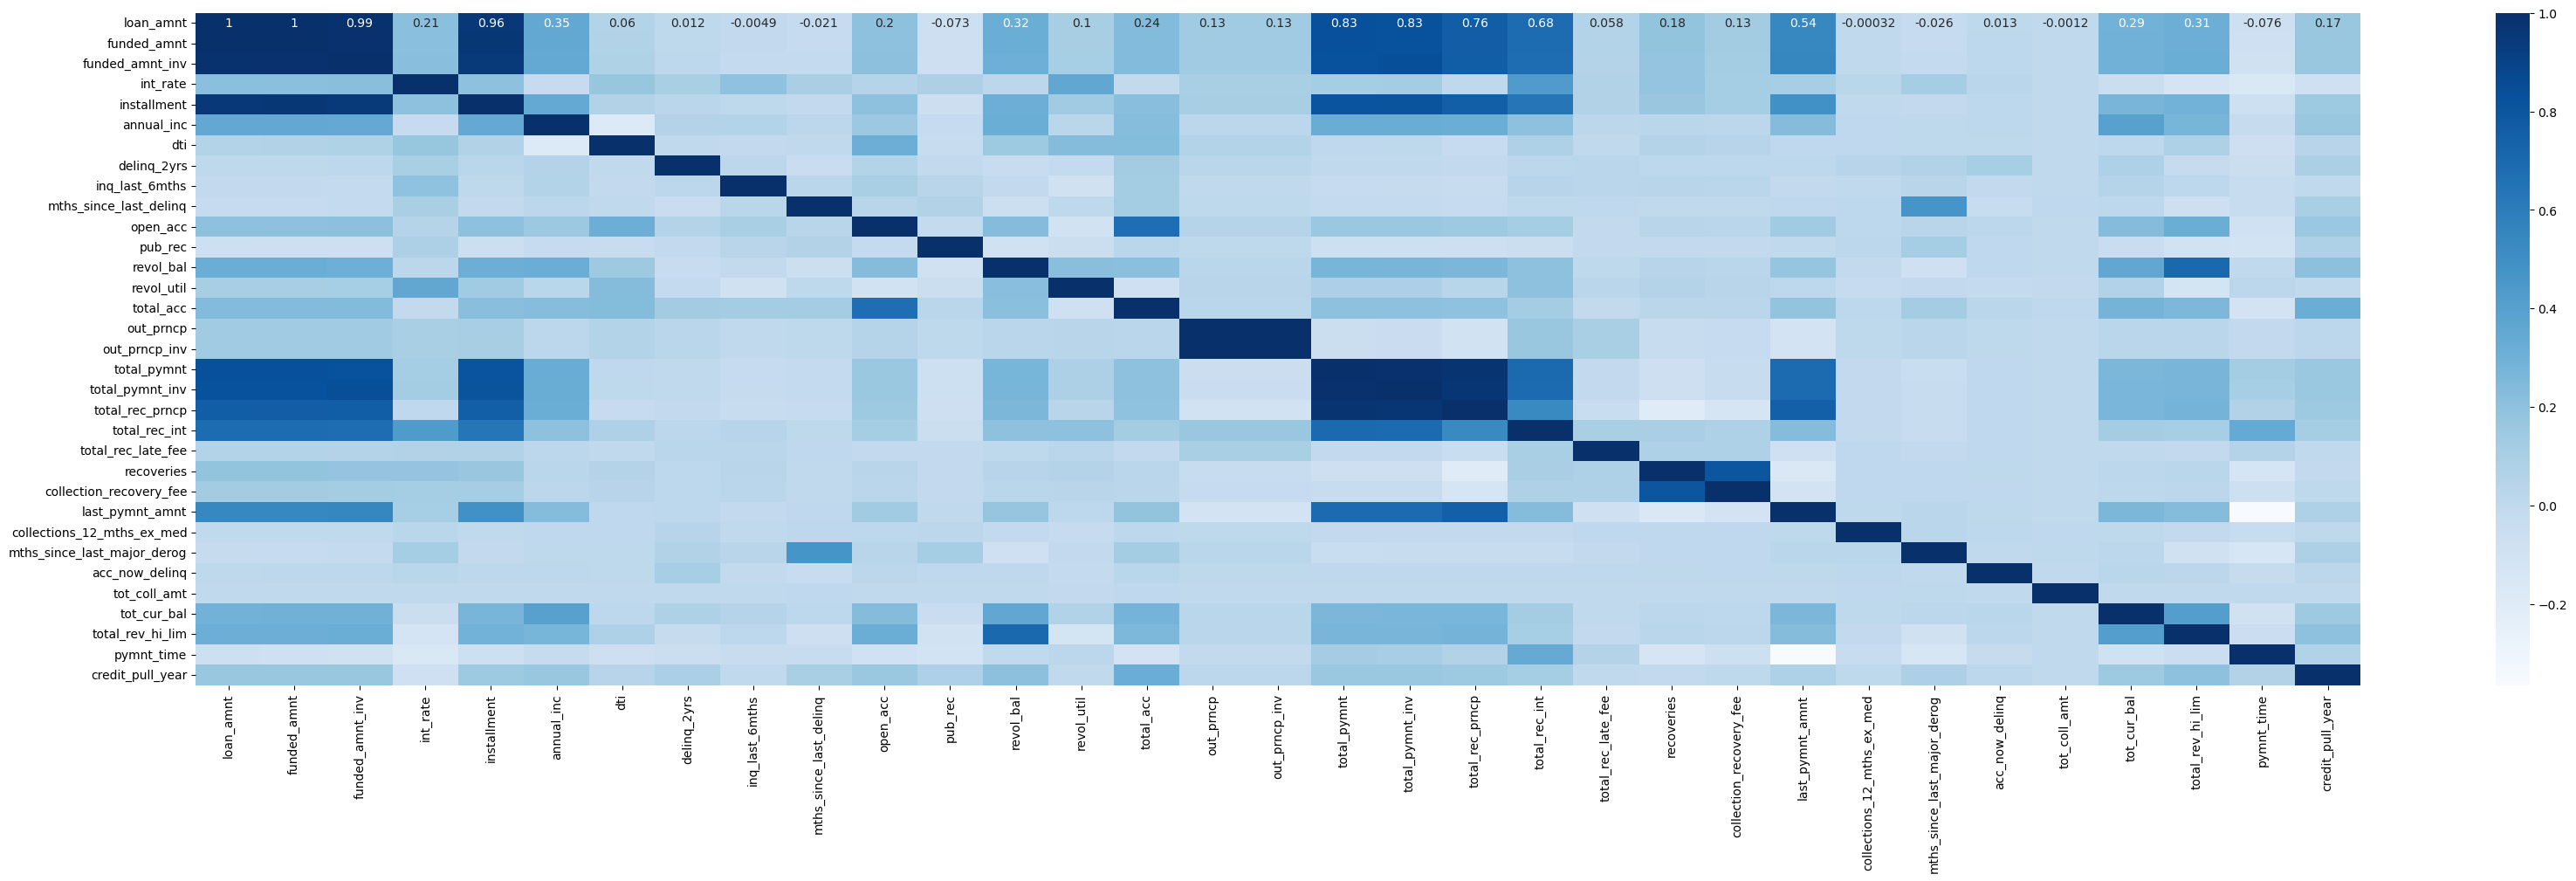

In [76]:
non_used = ['Unnamed: 0','id','member_id','policy_code','loan_status']
uni_dist = df_cred.select_dtypes(include = [np.float64,np.int64])
uni_dist = uni_dist[uni_dist.columns[~uni_dist.columns.isin(non_used)]]
fig = plt.figure(figsize = (40,10))
sns.heatmap(uni_dist.corr(),cmap = 'Blues', annot = True);

In [70]:
def top_correlation (df,n):
    corr_matrix = df.corr()
    correlation = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))
                 .stack()
                 .sort_values(ascending = False))
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns = ["Variable_1", "Variable_2", "Correlation"]
    correlation = correlation.reindex(correlation.Correlation.abs().sort_values(ascending = False).index).reset_index().drop(["index"], axis = 1)
    return correlation.head(n)
print("High Correlated Features (Corr > 0.5)")
top_correlation(uni_dist, 39)

High Correlated Features (Corr > 0.5)


,Variable_1,Variable_2,Correlation
0,out_prncp,out_prncp_inv,0.999999
1,loan_amnt,funded_amnt,0.997286
2,total_pymnt,total_pymnt_inv,0.993913
3,funded_amnt,funded_amnt_inv,0.992104
4,loan_amnt,funded_amnt_inv,0.988784
5,total_pymnt,total_rec_prncp,0.973771
6,total_pymnt_inv,total_rec_prncp,0.968241
7,funded_amnt,installment,0.959611
8,loan_amnt,installment,0.955520
9,funded_amnt_inv,installment,0.951136


In [71]:
df_corr = top_correlation(uni_dist,41)
df_corr.to_excel('df_corr_3.xlsx', index = False)
!cp 'df_corr_3.xlsx' '/dataset'
print('Saving correlation data is done!')

cp: /dataset: Read-only file system
Saving correlation data is done!
